<a href="https://colab.research.google.com/github/VamsiKrishna-05/Profile/blob/main/Digital_Image_Processing_DA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRAYSCALE TRANSFORMATION

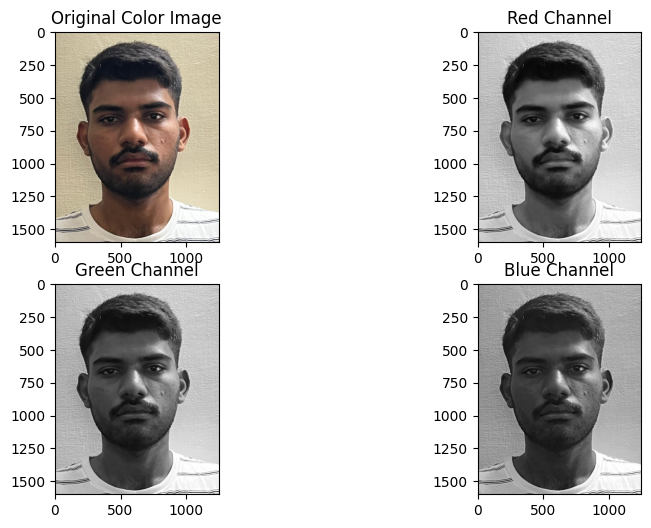

In [2]:
import cv2
import matplotlib.pyplot as plt

# Read color image
img = cv2.imread("p1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split color planes
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]

# Plot
plt.figure(figsize=(10,6))
plt.subplot(2,2,1), plt.imshow(img_rgb), plt.title("Original Color Image")

plt.subplot(2,2,2), plt.imshow(R, cmap='gray'), plt.title("Red Channel")
plt.subplot(2,2,3), plt.imshow(G, cmap='gray'), plt.title("Green Channel")
plt.subplot(2,2,4), plt.imshow(B, cmap='gray'), plt.title("Blue Channel")
plt.show()


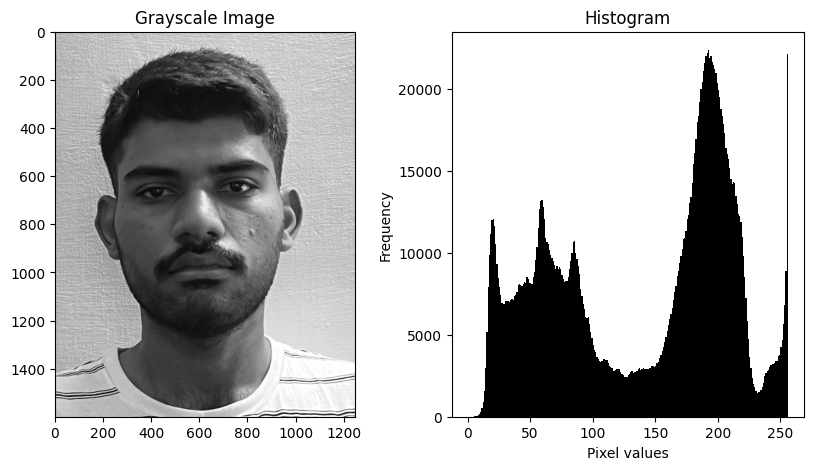

In [4]:
import cv2
import matplotlib.pyplot as plt

# Read grayscale image
img = cv2.imread("p1.jpg", cv2.IMREAD_GRAYSCALE)

# Plot image and histogram
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title("Grayscale Image")
plt.subplot(1,2,2), plt.hist(img.ravel(), bins=256, range=[0,256], color='black')
plt.title("Histogram")
plt.xlabel("Pixel values")
plt.ylabel("Frequency")
plt.show()


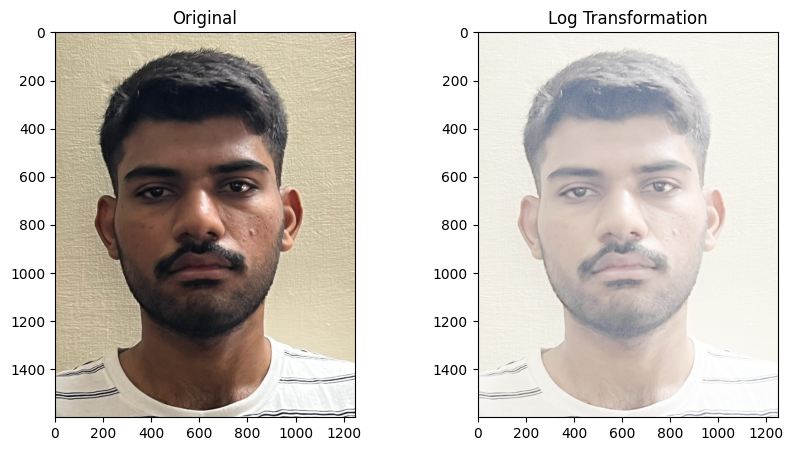

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("p1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def log_transform(img):
    # Convert to float to avoid overflow/underflow
    img_float = img.astype(np.float32)

    # Add +1 to avoid log(0)
    log_img = np.log1p(img_float)

    # Normalize back to 0–255
    log_img = cv2.normalize(log_img, None, 0, 255, cv2.NORM_MINMAX)

    # Convert back to uint8
    log_img = np.uint8(log_img)
    return log_img

# Apply log transformation
log_img = log_transform(img)

# Plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(log_img), plt.title("Log Transformation")
plt.show()


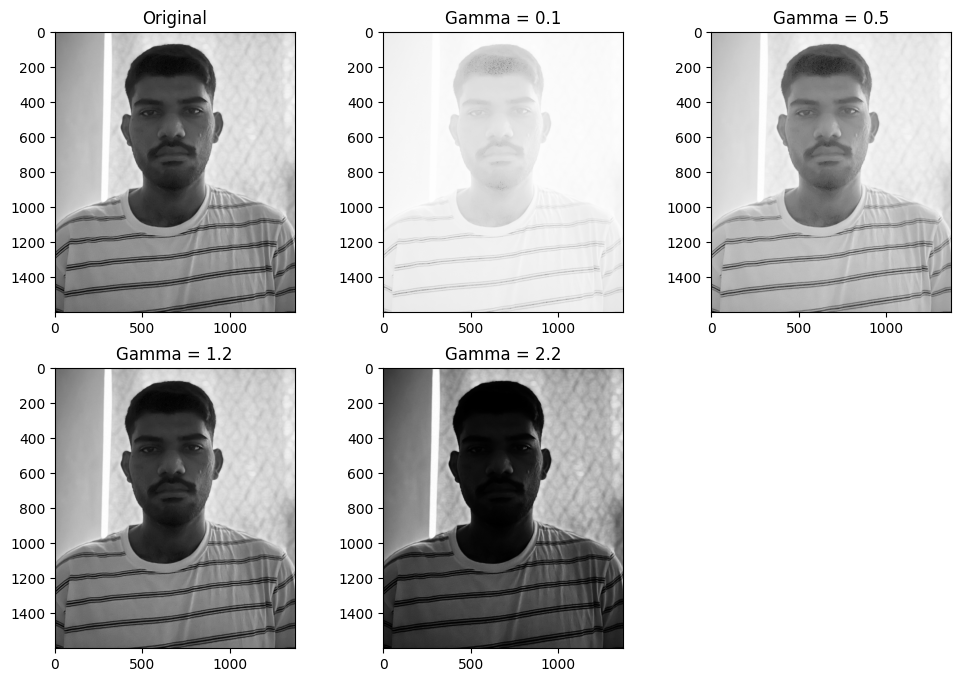

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read grayscale image
img = cv2.imread("p3.jpg", cv2.IMREAD_GRAYSCALE)

# Apply gamma transformations
gammas = [0.1, 0.5, 1.2, 2.2]

plt.figure(figsize=(12,8))
plt.subplot(2,3,1), plt.imshow(img, cmap='gray'), plt.title("Original")

for i, gamma in enumerate(gammas):
    gamma_corrected = np.array(255 * ((img / 255) ** gamma), dtype=np.uint8)
    plt.subplot(2,3,i+2)
    plt.imshow(gamma_corrected, cmap='gray')
    plt.title(f"Gamma = {gamma}")

plt.show()


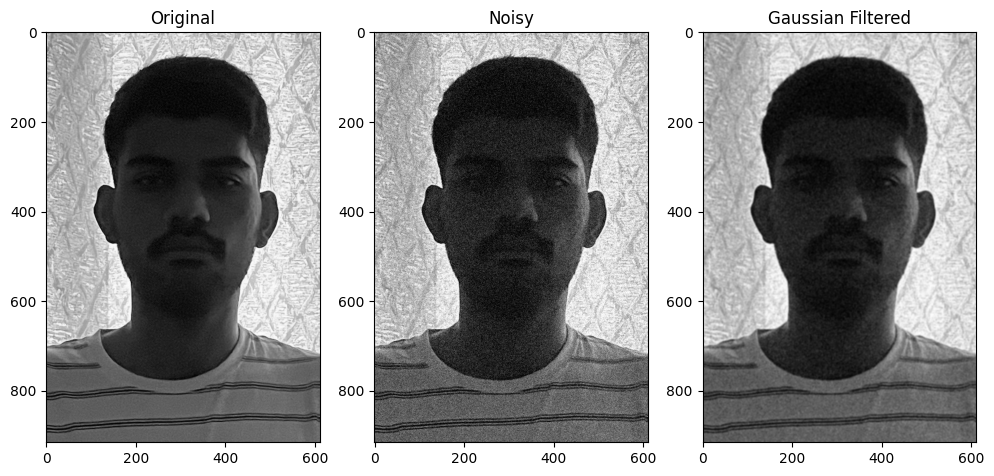

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read grayscale image
img = cv2.imread("p2.jpg", cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise
noise = np.random.normal(0, 25, img.shape)
noisy_img = np.clip(img + noise, 0, 255).astype(np.uint8)

# Apply Gaussian filter
gaussian_filtered = cv2.GaussianBlur(noisy_img, (7,7), sigmaX=1.5)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(noisy_img, cmap='gray'), plt.title("Noisy")
plt.subplot(1,3,3), plt.imshow(gaussian_filtered, cmap='gray'), plt.title("Gaussian Filtered")
plt.show()


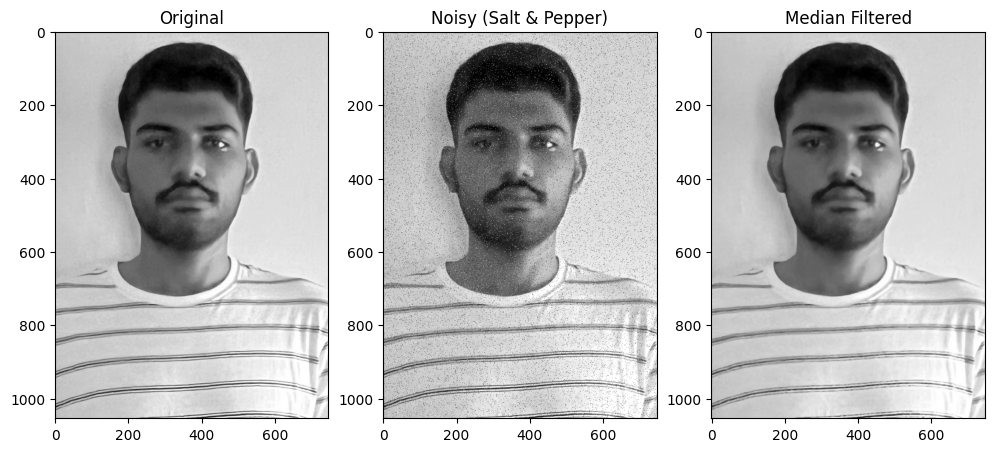

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read grayscale image
img = cv2.imread("p4.jpg", cv2.IMREAD_GRAYSCALE)

# Copy image for noise
noisy_img = img.copy()

# Salt noise
num_salt = int(img.size * 0.025)  # 2.5% pixels salt
coords = (np.random.randint(0, img.shape[0], num_salt),
          np.random.randint(0, img.shape[1], num_salt))
noisy_img[coords] = 255

# Pepper noise
num_pepper = int(img.size * 0.025)  # 2.5% pixels pepper
coords = (np.random.randint(0, img.shape[0], num_pepper),
          np.random.randint(0, img.shape[1], num_pepper))
noisy_img[coords] = 0

# Apply median filter
median_filtered = cv2.medianBlur(noisy_img, 5)

# Plot
plt.figure(figsize=(12,6))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(noisy_img, cmap='gray'), plt.title("Noisy (Salt & Pepper)")
plt.subplot(1,3,3), plt.imshow(median_filtered, cmap='gray'), plt.title("Median Filtered")
plt.show()


# COLOURED TRANSFORMATION

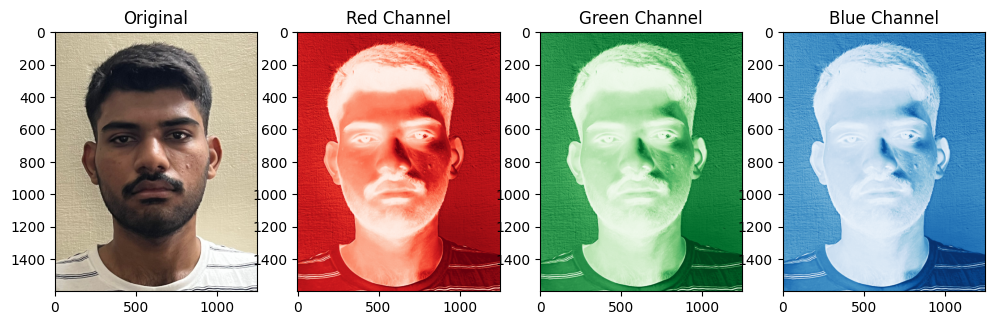

In [32]:
import cv2
import matplotlib.pyplot as plt

# Read color image
img = cv2.imread("p1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split channels
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]

# Plot
plt.figure(figsize=(12,6))
plt.subplot(1,4,1), plt.imshow(img), plt.title("Original")
plt.subplot(1,4,2), plt.imshow(R, cmap='Reds'), plt.title("Red Channel")
plt.subplot(1,4,3), plt.imshow(G, cmap='Greens'), plt.title("Green Channel")
plt.subplot(1,4,4), plt.imshow(B, cmap='Blues'), plt.title("Blue Channel")
plt.show()


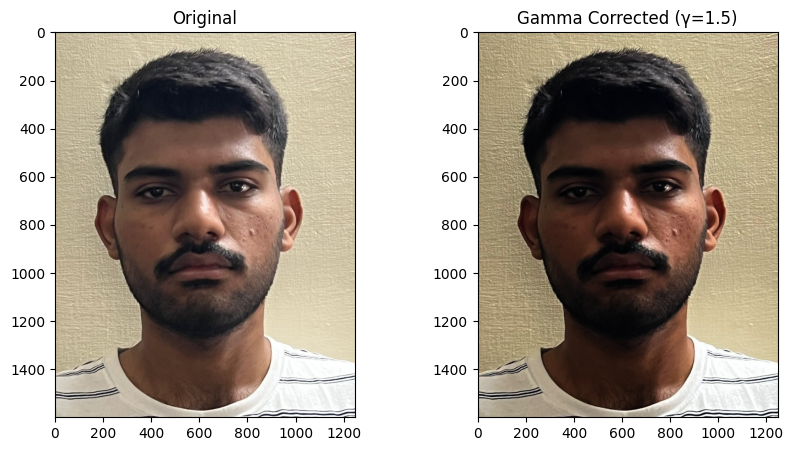

In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read color image
img = cv2.imread("p1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Gamma correction
gamma = 1.5   # >1 darker, <1 brighter
gamma_corrected = np.array(255 * (img / 255.0) ** gamma, dtype=np.uint8)

# Plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(gamma_corrected), plt.title(f"Gamma Corrected (γ={gamma})")
plt.show()


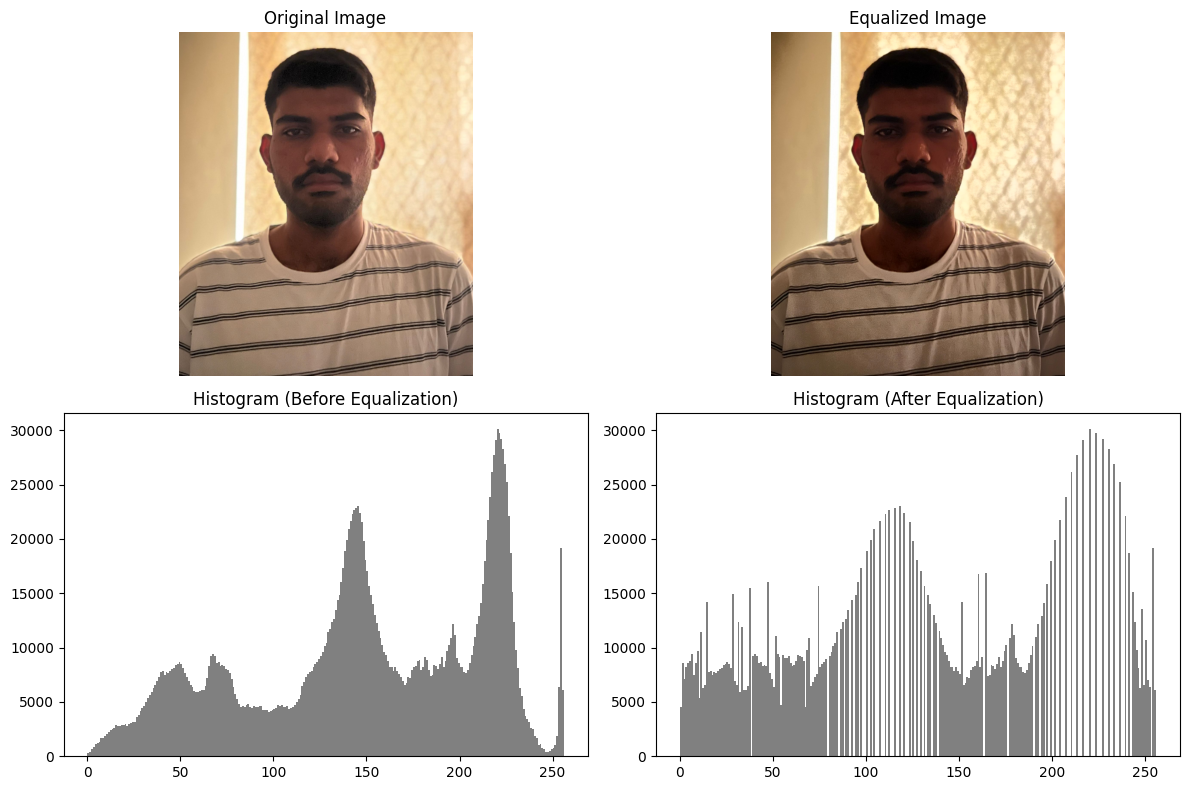

In [37]:
import cv2
import matplotlib.pyplot as plt

# Read color image
img = cv2.imread("p3.jpg")

# Convert from BGR → YCrCb
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

# Save Y channel before equalization
y_before = ycrcb[:,:,0].copy()

# Equalize only Y channel
ycrcb[:,:,0] = cv2.equalizeHist(ycrcb[:,:,0])

# Convert back to RGB
equalized = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2RGB)
original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot images and histograms
plt.figure(figsize=(12,8))

# Original image
plt.subplot(2,2,1)
plt.imshow(original)
plt.title("Original Image")
plt.axis("off")

# Equalized image
plt.subplot(2,2,2)
plt.imshow(equalized)
plt.title("Equalized Image")
plt.axis("off")

# Histogram before
plt.subplot(2,2,3)
plt.hist(y_before.ravel(), bins=256, range=[0,256], color='gray')
plt.title("Histogram (Before Equalization)")

# Histogram after
plt.subplot(2,2,4)
plt.hist(ycrcb[:,:,0].ravel(), bins=256, range=[0,256], color='gray')
plt.title("Histogram (After Equalization)")

plt.tight_layout()
plt.show()


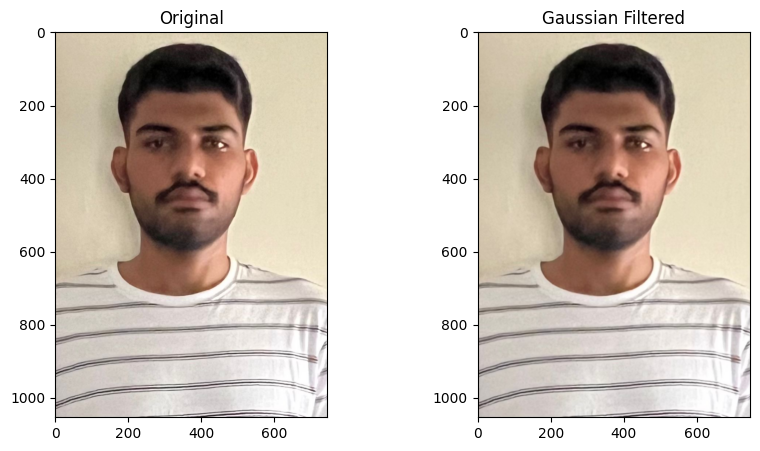

In [40]:
import cv2
import matplotlib.pyplot as plt

# Read color image
img = cv2.imread("p4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Add Gaussian blur
gaussian_filtered = cv2.GaussianBlur(img, (3,3), 1.5)

# Plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(gaussian_filtered), plt.title("Gaussian Filtered")
plt.show()


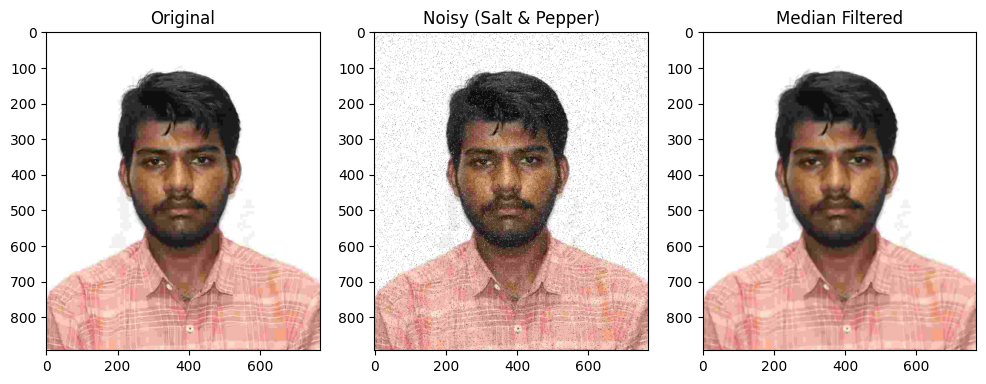

In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read color image
img = cv2.imread("p5.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Add salt & pepper noise
noisy_img = img.copy()
prob = 0.05  # 5% noise
mask = np.random.choice([0, 1, 2], size=img.shape[:2], p=[prob/2, prob/2, 1-prob])
noisy_img[mask==0] = 0       # pepper
noisy_img[mask==1] = 255     # salt

# Apply median filter
median_filtered = cv2.medianBlur(noisy_img, 5)

# Plot
plt.figure(figsize=(12,6))
plt.subplot(1,3,1), plt.imshow(img), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(noisy_img), plt.title("Noisy (Salt & Pepper)")
plt.subplot(1,3,3), plt.imshow(median_filtered), plt.title("Median Filtered")
plt.show()
